In [0]:
# 30个频率频道 116*116输入   3dcnn2 十个demsity对比  

In [2]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=bc1248b6b1b655521f9a92ab0ae328f2ec3051dd3ce8d6efb542502eb684db11
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"
from model_functions import *

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks
importing Jupyter notebook from model_functions.ipynb


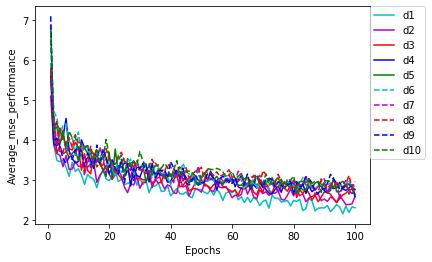

In [10]:
# 跑十个density的mse 并且plot保存起来
d1 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/1/Average_mse_history.npy') 
d2 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/2/Average_mse_history.npy') 
d3 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/3/Average_mse_history.npy') 
d4 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/4/Average_mse_history.npy') 
d5 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/5/Average_mse_history.npy') 
d6 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/6/Average_mse_history.npy') 
d7 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/7/Average_mse_history.npy') 
d8 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/8/Average_mse_history.npy') 
d9 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/9/Average_mse_history.npy') 
d10 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/10/Average_mse_history.npy') 

epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, d1,'c',  label='d1' )
plt.plot(epochs, d2,'m',  label='d2' )
plt.plot(epochs, d3,'r',  label='d3' )
plt.plot(epochs, d4,'b',  label='d4' )
plt.plot(epochs, d5,'g',  label='d5' )
plt.plot(epochs, d6,'c--',  label='d6' )
plt.plot(epochs, d7,'m--',  label='d7' )
plt.plot(epochs, d8,'r--',  label='d8' )
plt.plot(epochs, d9,'b--',  label='d9' )
plt.plot(epochs, d10,'g--',  label='d10' )

plt.xlabel('Epochs')
plt.ylabel('Average_mse_performance')
# plt.legend()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
# plt.show()
plt.savefig('/content/drive/My Drive/original_6_10density_mse.png' ,dpi=1200)

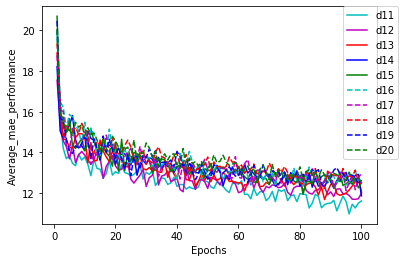

In [12]:
# 跑十个density的mae 并且plot保存起来
d11 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/1/Average_mae_history.npy') 
d12 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/2/Average_mae_history.npy') 
d13 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/3/Average_mae_history.npy') 
d14 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/4/Average_mae_history.npy') 
d15 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/5/Average_mae_history.npy') 
d16 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/6/Average_mae_history.npy') 
d17 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/7/Average_mae_history.npy') 
d18 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/8/Average_mae_history.npy') 
d19 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/9/Average_mae_history.npy') 
d20 = np.load('/content/drive/My Drive/Original_6Matrix_10Density/10/Average_mae_history.npy') 

epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, d11,'c',  label='d11' )
plt.plot(epochs, d12,'m',  label='d12' )
plt.plot(epochs, d13,'r',  label='d13' )
plt.plot(epochs, d14,'b',  label='d14' )
plt.plot(epochs, d15,'g',  label='d15' )
plt.plot(epochs, d16,'c--',  label='d16' )
plt.plot(epochs, d17,'m--',  label='d17' )
plt.plot(epochs, d18,'r--',  label='d18' )
plt.plot(epochs, d19,'b--',  label='d19' )
plt.plot(epochs, d20,'g--',  label='d20' )

plt.xlabel('Epochs')
plt.ylabel('Average_mae_performance')
# plt.legend()
plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
# plt.show()
plt.savefig('/content/drive/My Drive/original_6_10density_mae.png' ,dpi=1200)

In [0]:
# i = 1
    
# data = np.load('/content/drive/My Drive/ready_data_6C/matrix_input/' + str(i)+ '.npy') 


# Label = np.load('/content/drive/My Drive/ready_data_6C/output/output.npy')
# data = np.reshape(data,(96, 6, 116, 116, 1))

In [0]:

# def SPLIT(data,split):

#   data, label = shuffle(data, Label, random_state=20)

#   train_data = data[:split]
#   train_label = label[:split]
#   test_data = data[split:]
#   test_label = label[split:]

#   return train_data, train_label, test_data, test_label


# train_data, train_label, test_data, test_label = SPLIT(data,72) 

# def k_fold(k,train_data,train_targets):
#   num_val_samples = len(train_data)//k
#   val_mses = []
#   val_maes = []
#   mse_History = []
#   mae_History = []
#   num_epochs = 100
#   batchsize = 6
#   for i in range(k):
#     print('processing fold #', i)
#     val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
#     val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
#     partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
#     partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
#     model = threeD_CNN3()
#     history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
#     val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
#     mse_history = history.history['loss']
#     mae_history = history.history['mean_absolute_error']
#     val_mses.append(val_mse)
#     val_maes.append(val_mae)
#     mse_History.append(mse_history)
#     mae_History.append(mae_history)
#   average_mae_history = [(np.mean([x[i] for x in mae_History]))*100 for i in range(100)] 
#   average_mse_history = [(np.mean([x[i] for x in mse_History]))*100 for i in range(100)]
  
#   return val_mses, val_maes, average_mse_history, average_mae_history

# val_mses, val_maes, average_mse_history, average_mae_history = k_fold(4,train_data,train_label)



In [0]:


# def k_fold(k,train_data,train_targets):
#   num_val_samples = len(train_data)//k
#   val_mses = []
#   val_maes = []
#   mse_History = []
#   mae_History = []
#   num_epochs = 100
#   batchsize = 6
#   for i in range(k):
#     print('processing fold #', i)
#     val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
#     val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
#     partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
#     partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
#     model = threeD_CNN4()
#     history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
#     val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
#     mse_history = history.history['loss']
#     mae_history = history.history['mean_absolute_error']
#     val_mses.append(val_mse)
#     val_maes.append(val_mae)
#     mse_History.append(mse_history)
#     mae_History.append(mae_history)
#   average_mae_history = [(np.mean([x[i] for x in mae_History]))*100 for i in range(100)] 
#   average_mse_history = [(np.mean([x[i] for x in mse_History]))*100 for i in range(100)]
  
#   return val_mses, val_maes, average_mse_history, average_mae_history

# val_mses1, val_maes1, average_mse_history1, average_mae_history1 = k_fold(4,train_data,train_label)



In [0]:

for i in range(1,11):
      
  data = np.load('/content/drive/My Drive/ready_data_6C/matrix_input/' + str(i)+ '.npy') 
  Label = np.load('/content/drive/My Drive/ready_data_6C/output/output.npy')
  data = np.reshape(data,(96, 6, 116, 116, 1)) 

  def SPLIT(data,split):

    data, label = shuffle(data, Label, random_state=20)

    train_data = data[:split]
    train_label = label[:split]
    test_data = data[split:]
    test_label = label[split:]

    return train_data, train_label, test_data, test_label


  train_data, train_label, test_data, test_label = SPLIT(data,72) 

  def k_fold(k,train_data,train_targets):
    num_val_samples = len(train_data)//k
    val_mses = []
    val_maes = []
    mse_History = []
    mae_History = []
    num_epochs = 100
    batchsize = 6
    for i in range(k):
      print('processing fold #', i)
      val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
      val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
      partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
      partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
      model = threeD_CNN5()
      history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
      val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
      mse_history = history.history['loss']
      mae_history = history.history['mean_absolute_error']
      val_mses.append(val_mse)
      val_maes.append(val_mae)
      mse_History.append(mse_history)
      mae_History.append(mae_history)
    average_mae_history = [(np.mean([x[i] for x in mae_History]))*100 for i in range(100)] 
    average_mse_history = [(np.mean([x[i] for x in mse_History]))*100 for i in range(100)]
    
    return val_mses, val_maes, average_mse_history, average_mae_history

  val_mses, val_maes, average_mse_history, average_mae_history= k_fold(4,train_data,train_label)

  Val_mses = np.array(val_mses)
  Val_maes = np.array(val_maes)
  Average_mse_history = np.array(average_mse_history)
  Average_mae_history = np.array(average_mae_history)

  np.save('/content/drive/My Drive/Original_6Matrix_10Density/'+ str(i) + '/Val_mses'  , Val_mses)
  np.save('/content/drive/My Drive/Original_6Matrix_10Density/'+ str(i) + '/Val_maes'  , Val_maes)
  np.save('/content/drive/My Drive/Original_6Matrix_10Density/'+ str(i) + '/Average_mae_history', Average_mae_history)
  np.save('/content/drive/My Drive/Original_6Matrix_10Density/'+ str(i) + '/Average_mse_history', Average_mse_history)


In [0]:


# Val_mses.append(val_mses)
# Val_maes.append(val_maes)
# Average_mse_history.append(average_mse_history)
# Average_mae_history.append(average_mae_history)

# Val_mses = np.array(val_mses)
# Val_maes = np.array(val_maes)
# Average_mse_history = np.array(average_mse_history)
# Average_mae_history = np.array(average_mae_history)

# np.save('/content/drive/My Drive/Original_6Matrix_10Density/'+ str(i) + '/Val_mses'  , Val_mses)
# np.save('/content/drive/My Drive/Original_6Matrix_10Density/'+ str(i) + '/Val_maes'  , Val_maes)
# np.save('/content/drive/My Drive/Original_6Matrix_10Density/'+ str(i) + '/Average_mae_history', Average_mae_history)
# np.save('/content/drive/My Drive/Original_6Matrix_10Density/'+ str(i) + '/Average_mse_history', Average_mse_history)


# # #model 3Dcnn 
# # epochs = range(1,len(average_mse_history)+1)
# # plt.plot(epochs, average_mae_history,'c',  label='mae' )
# # plt.plot(epochs, average_mse_history,'m',  label='mse' )
# # plt.xlabel('Epochs')
# # plt.ylabel('Validation')
# # plt.show()

NameError: ignored

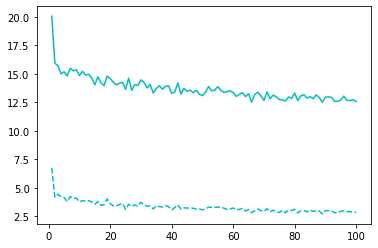

In [9]:
epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, average_mae_history,'c',  label='mae cnn3' )
plt.plot(epochs, average_mse_history,'c--',  label='mse cnn3' )
plt.plot(epochs, average_mae_history1,'m',  label='mae1 cnn4' )
plt.plot(epochs, average_mse_history1,'m--',  label='mse1 cnn4' )
plt.plot(epochs, average_mae_history2,'r',  label='mae2 cnn5' )
plt.plot(epochs, average_mse_history2,'r--',  label='mse2 cnn5' )
plt.xlabel('Epochs')
plt.ylabel('Average_performance')
plt.legend()
# plt.show()
# plt.savefig('/content/drive/My Drive/original_30_3models_comparison.png' ,dpi=1200)

In [0]:
# # 此部分为用cnn5来测试数据集 并没有效果很不好 
# data, label = shuffle(data, Label)
# split = 72
# train_data = data[:split]
# train_label = label[:split]
# test_data = data[split:]
# test_label = label[split:]
# model = threeD_CNN5() 
# history = model.fit(train_data, train_label, epochs=100, batch_size = 6, verbose=0)
# comparision = (model.predict(test_data))*100 
# x_data = range(24)
# Test_label = test_label*100
# y_data_c1 = Test_label[:,0]
# y_data_c2 = Test_label[:,1]
# y_data_c3 = Test_label[:,2]
# y_predict1_c1 = comparision[:,0]
# y_predict1_c2 = comparision[:,1]
# y_predict1_c3 = comparision[:,2]
# fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
# fig.suptitle('3 visual conditions') 


# predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
# predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
# predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
# predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict_c1')
# predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict_c2')
# predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict_c3')

# predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# # plt.title('loss')
# # plt.xlabel('Epochs')
# # plt.ylabel('Loss')
# # plt.show() 

In [0]:
# mse1 = history1.history['loss']
# mae1 = history1.history['mean_absolute_error']
# mse2 = history2.history['loss']
# mae2 = history2.history['mean_absolute_error']
# mse3 = history3.history['loss']
# mae3 = history3.history['mean_absolute_error']
# # val_loss = history.history['val_loss']
# # acc = history.history['acc']
# # val_acc=history.history['val_acc']
# epochs = range(1,len(mse1) +1)
# plt.plot(epochs, mse1, 'c', label='mse1')
# plt.plot(epochs, mse2, 'm', label='mse2')
# plt.plot(epochs, mse3, 'r', label='mse3')

# plt.plot(epochs, mae1, 'c--', label='mae1')
# plt.plot(epochs, mae2, 'm--', label='mae2')
# plt.plot(epochs, mae3, 'r--', label='mae3')

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show() 
# # plt.savefig('/content/drive/My Drive/original_30_3models_comparison.png' ,dpi=2400)

In [0]:
# comparision1 = (model1.predict(test_data))*100
# comparision2 =(model2.predict(test_data))*100
# comparision3 = (model3.predict(test_data))*100
# print(comparision1[0,0])
# print(comparision2)


In [0]:
# x_data = range(24)
# Test_label = test_label*100
# y_data_c1 = Test_label[:,0]
# y_data_c2 = Test_label[:,1]
# y_data_c3 = Test_label[:,2]
# y_predict1_c1 = comparision1[:,0]
# y_predict1_c2 = comparision1[:,1]
# y_predict1_c3 = comparision1[:,2]
# y_predict2_c1 = comparision2[:,0]
# y_predict2_c2 = comparision2[:,1]
# y_predict2_c3 = comparision2[:,2]
# y_predict3_c1 = comparision3[:,0]
# y_predict3_c2 = comparision3[:,1]
# y_predict3_c3 = comparision3[:,2]

# fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
# fig.suptitle('3 visual conditions') 


# predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
# predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
# predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
# predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
# predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
# predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
# predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
# predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
# predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
# predict_c1.plot(x_data, y_predict3_c1 , 'c-.', label='predict2_c1')
# predict_c2.plot(x_data, y_predict3_c2 , 'r-.', label='predict2_c2')
# predict_c3.plot(x_data, y_predict3_c3 , 'b-.', label='predict2_c3')

# predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# # plt.title('loss')
# # plt.xlabel('Epochs')
# # plt.ylabel('Loss')
# # plt.show() 
# # fig.savefig('/content/drive/My Drive/ready_data_6C/matrix_input/1.png' ,bbox_inches='tight')

In [0]:
# print(comparision1.shape)
# y_data_c1 = test_label[:,0]
# print(y_data_c1.shape)

In [0]:
# def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
#   y_data_c1 = test_label[:,0]
#   y_data_c2 = test_label[:,1]
#   y_data_c3 = test_label[:,2]
#   y_predict1_c1 = predict[:,0]
#   y_predict1_c2 = predict[:,1]
#   y_predict1_c3 = predict[:,2]
#   tmp1 = 0
#   tmp2 = 0
#   tmp3 = 0
#   for i in range(24):
#     tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
#     tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
#     tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
#   c1 = tmp1 /24 
#   c2 = tmp2 /24
#   c3 = tmp3 /24
#   # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
#   # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
#   # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
#   return c1 , c2 ,c3 


In [0]:
# # from keras import backend as K
# Model1 = calculate_mse(comparision1)
# Model2 = calculate_mse(comparision2)